In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns 

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.drop("CustomerID", axis=1, inplace=True)
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Customer Visualization Based on Gender

In [5]:
# gender_df = customer_data.groupby('Gender')['CustomerID'].count().reset_index(name='Count')
gender_df = customer_data.Gender.value_counts()
gender_df

Female    112
Male       88
Name: Gender, dtype: int64

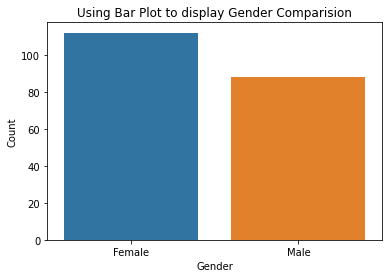

In [6]:
bar_plt = sns.barplot(x=gender_df.index,y=gender_df.values)
bar_plt.set_title("Using Bar Plot to display Gender Comparision")
bar_plt.set_xlabel("Gender")
bar_plt.set_ylabel("Count")
plt.show()

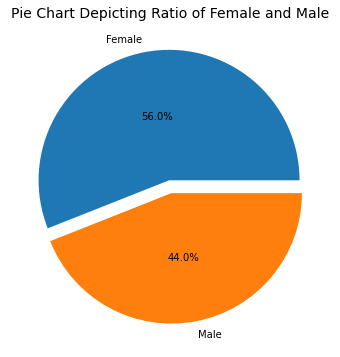

In [7]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = gender_df.index
plt.pie(x=gender_df.values, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Pie Chart Depicting Ratio of Female and Male", fontsize=14)
plt.show()

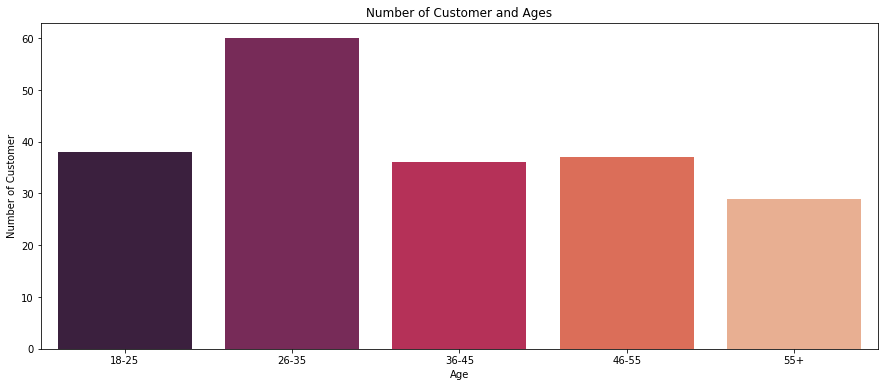

In [8]:
age18_25 = customer_data.Age[(customer_data.Age <= 25) & (customer_data.Age >= 18)]
age26_35 = customer_data.Age[(customer_data.Age <= 35) & (customer_data.Age >= 26)]
age36_45 = customer_data.Age[(customer_data.Age <= 45) & (customer_data.Age >= 36)]
age46_55 = customer_data.Age[(customer_data.Age <= 55) & (customer_data.Age >= 46)]
age55above = customer_data.Age[customer_data.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

## Visualization of Age Distribution

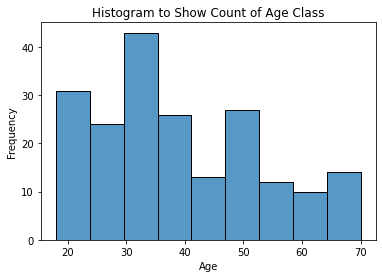

In [9]:
hist_plt = sns.histplot(x='Age', data = customer_data)
hist_plt.set_title("Histogram to Show Count of Age Class")
hist_plt.set_xlabel("Age")
hist_plt.set_ylabel("Frequency")
plt.show()

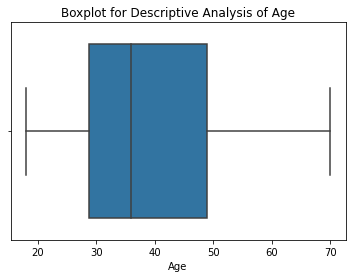

In [10]:
sns.boxplot(x='Age', data = customer_data).set_title('Boxplot for Descriptive Analysis of Age')
plt.show()

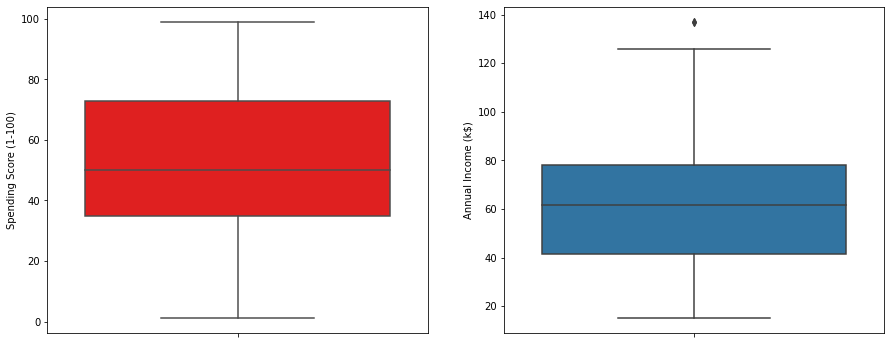

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=customer_data["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=customer_data["Annual Income (k$)"])
plt.show()

## Spending Score Visualization

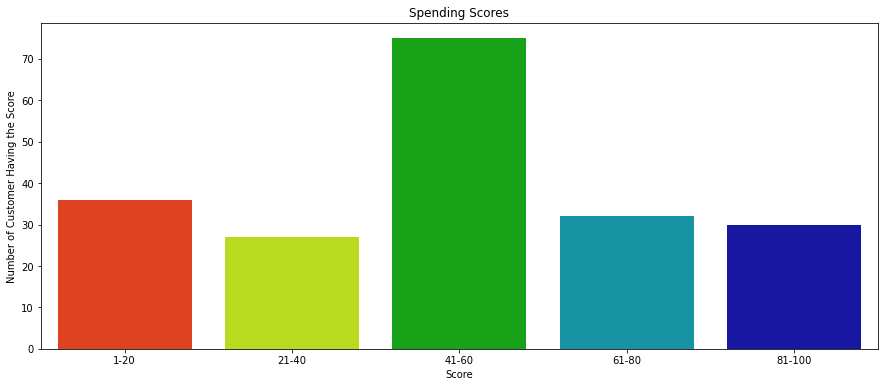

In [12]:
ss1_20 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 20)]
ss21_40 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 40)]
ss41_60 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 60)]
ss61_80 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 80)]
ss81_100 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

## Annual Income Visualization

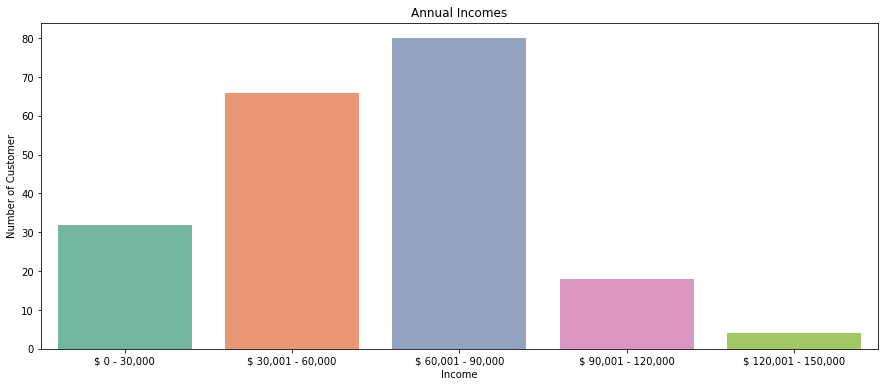

In [13]:
ai0_30 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 0) & (customer_data["Annual Income (k$)"] <= 30)]
ai31_60 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 31) & (customer_data["Annual Income (k$)"] <= 60)]
ai61_90 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 61) & (customer_data["Annual Income (k$)"] <= 90)]
ai91_120 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 91) & (customer_data["Annual Income (k$)"] <= 120)]
ai121_150 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 121) & (customer_data["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

## Find Out Optimal No Of Clusters

### Using Elbow Method

C:\Users\diamo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


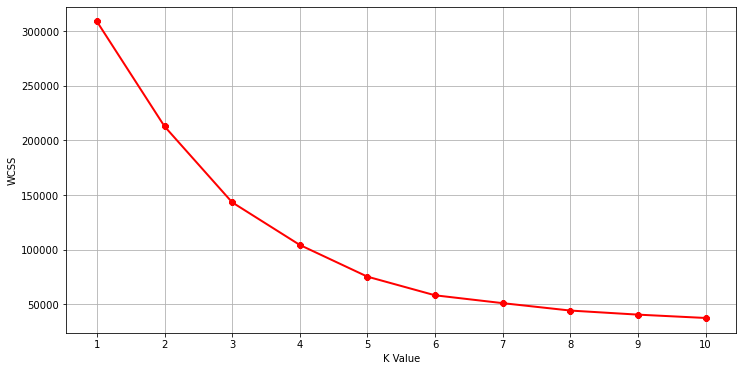

In [14]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(customer_data.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

### Using Silhoutte Method 

For n_clusters = 2 The average silhouette_score is : 0.293166070535953
For n_clusters = 3 The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 The average silhouette_score is : 0.44428597560893024
For n_clusters = 6 The average silhouette_score is : 0.4523443947724053
For n_clusters = 7 The average silhouette_score is : 0.4398198217929885
For n_clusters = 8 The average silhouette_score is : 0.4352315435135759
For n_clusters = 9 The average silhouette_score is : 0.4083885402537527
For n_clusters = 10 The average silhouette_score is : 0.38328343620113586


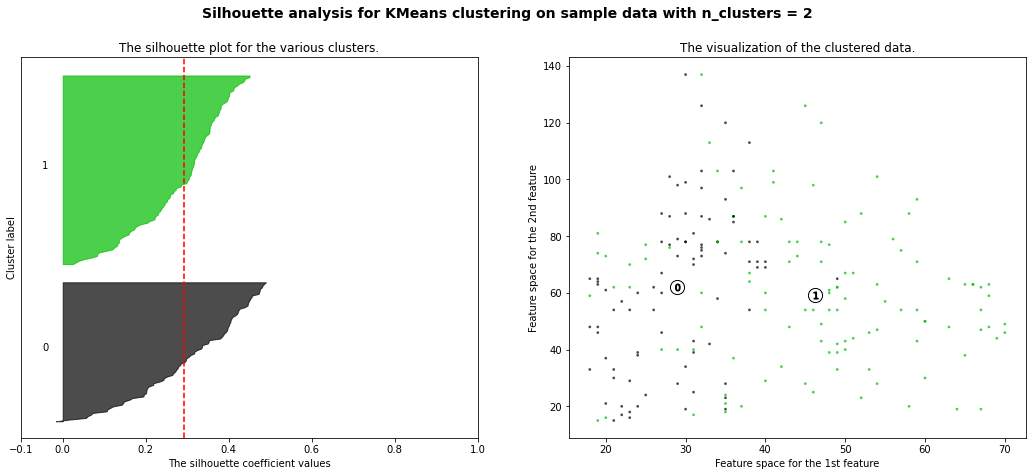

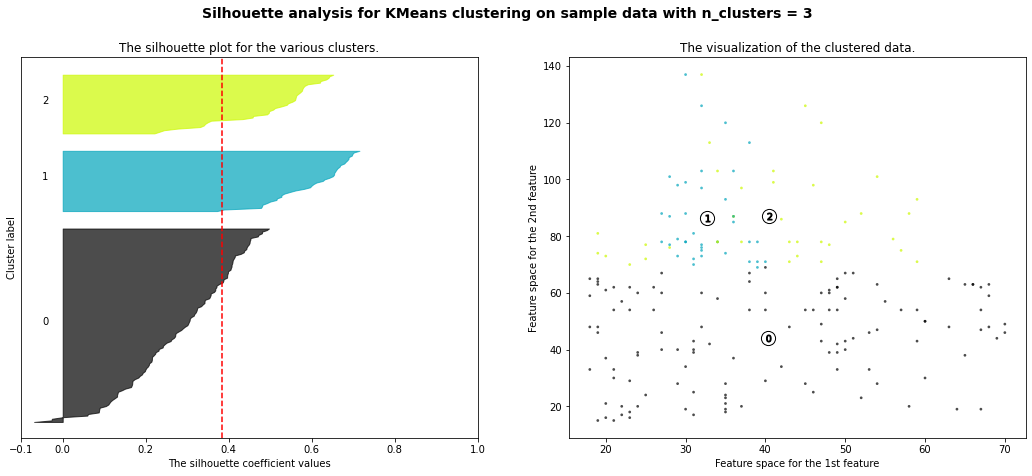

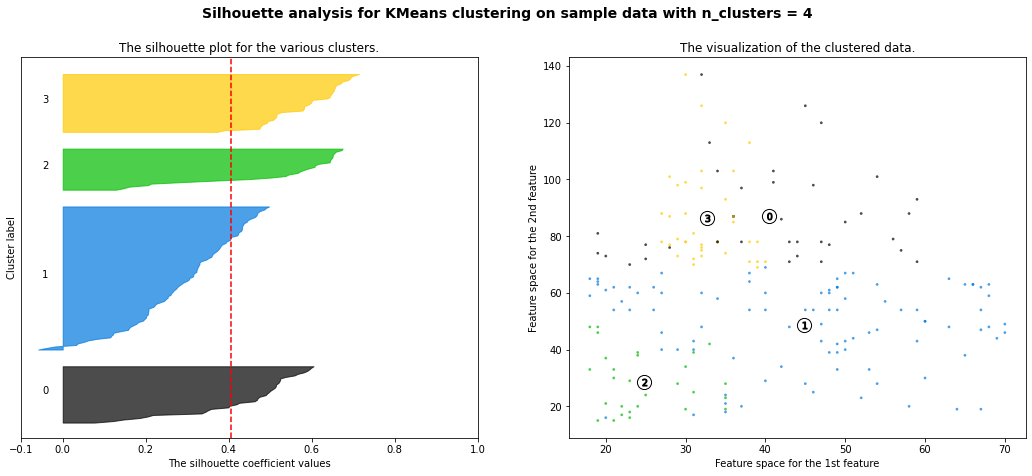

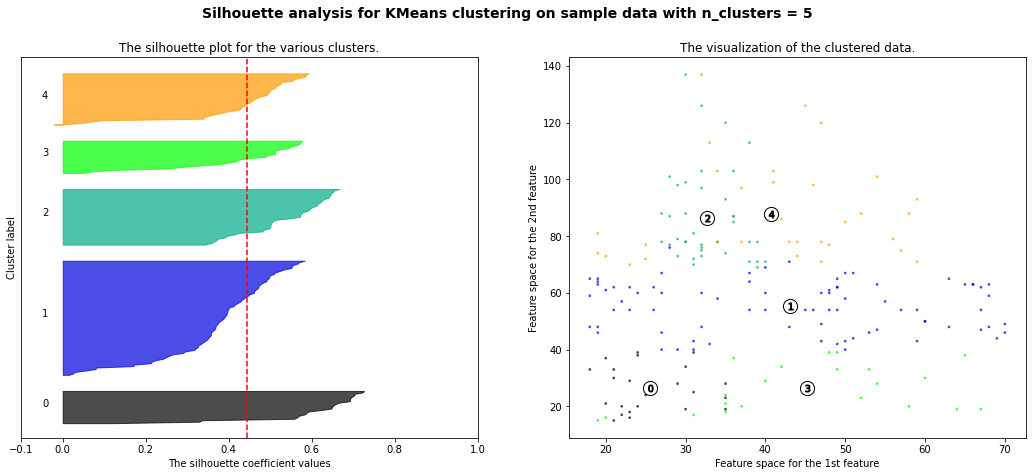

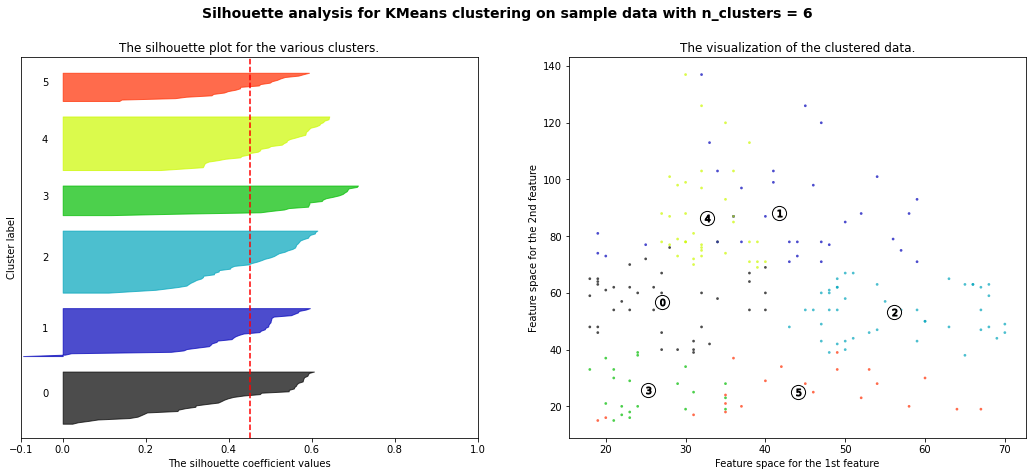

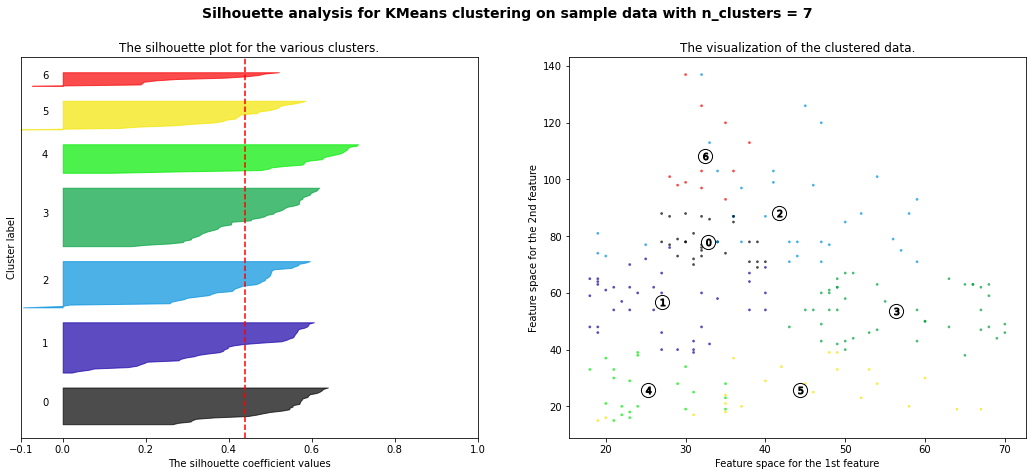

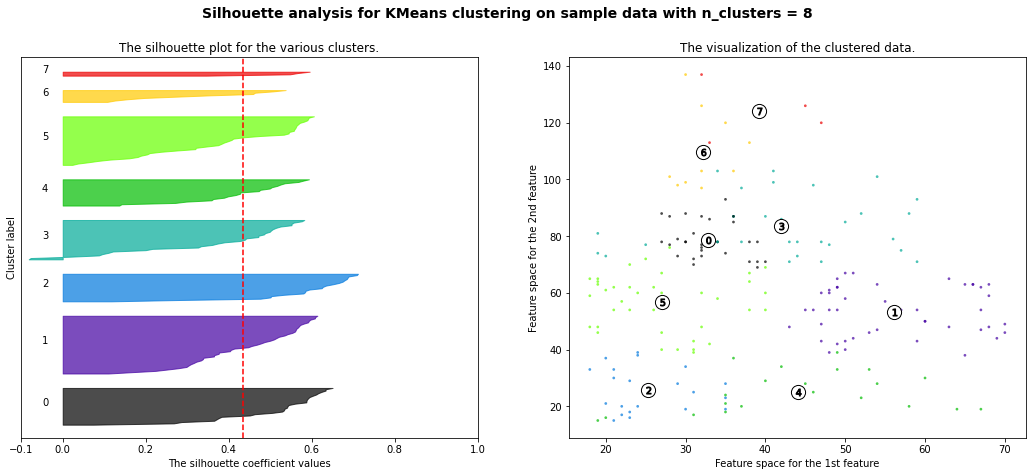

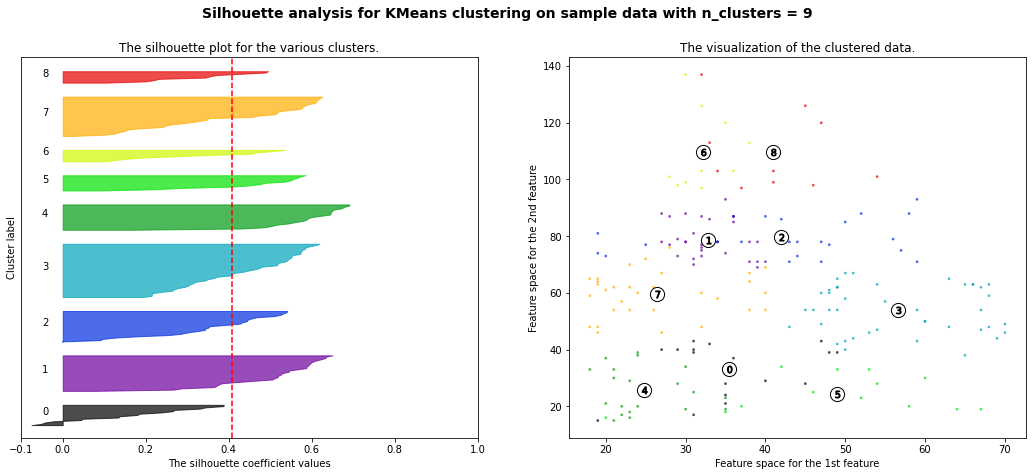

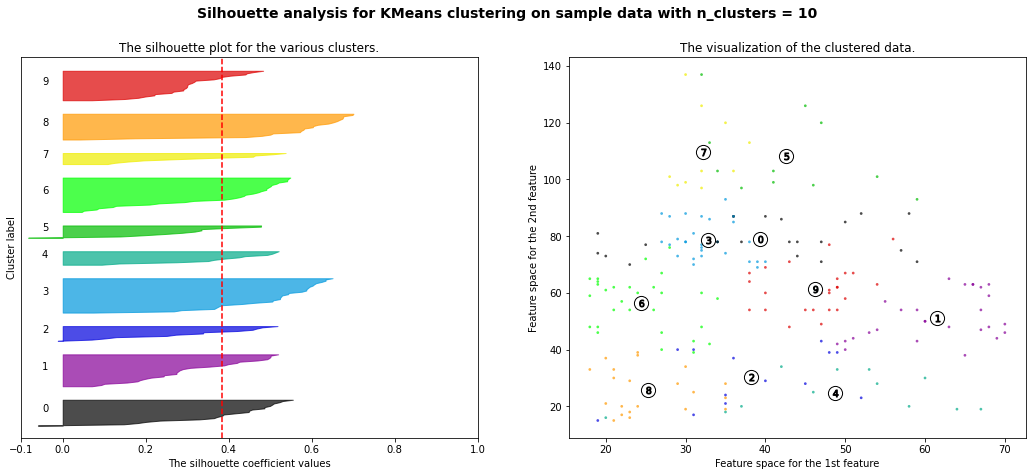

In [15]:
# Making  the independent variables matrix
X = customer_data.iloc[:, 1:].values

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

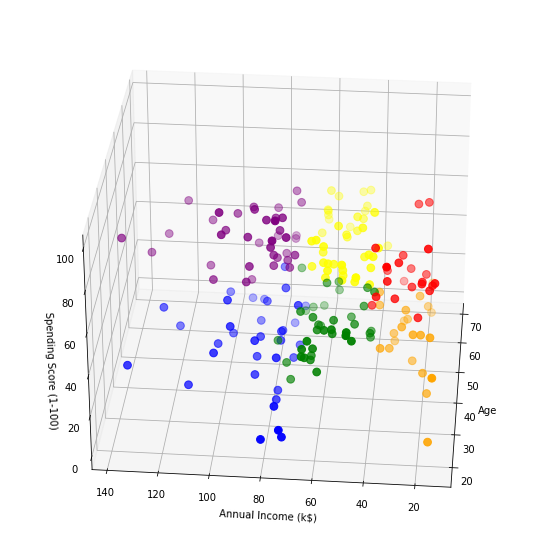

In [16]:
# Taking number of clusters as 6
km = KMeans(n_clusters=6)
clusters = km.fit_predict(customer_data.iloc[:,1:])
customer_data["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_data.Age[customer_data.label == 0], customer_data["Annual Income (k$)"][customer_data.label == 0], customer_data["Spending Score (1-100)"][customer_data.label == 0], c='blue', s=60)
ax.scatter(customer_data.Age[customer_data.label == 1], customer_data["Annual Income (k$)"][customer_data.label == 1], customer_data["Spending Score (1-100)"][customer_data.label == 1], c='red', s=60)
ax.scatter(customer_data.Age[customer_data.label == 2], customer_data["Annual Income (k$)"][customer_data.label == 2], customer_data["Spending Score (1-100)"][customer_data.label == 2], c='green', s=60)
ax.scatter(customer_data.Age[customer_data.label == 3], customer_data["Annual Income (k$)"][customer_data.label == 3], customer_data["Spending Score (1-100)"][customer_data.label == 3], c='orange', s=60)
ax.scatter(customer_data.Age[customer_data.label == 4], customer_data["Annual Income (k$)"][customer_data.label == 4], customer_data["Spending Score (1-100)"][customer_data.label == 4], c='purple', s=60)
ax.scatter(customer_data.Age[customer_data.label == 5], customer_data["Annual Income (k$)"][customer_data.label == 5], customer_data["Spending Score (1-100)"][customer_data.label == 5], c='yellow', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [17]:
font_title = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

font_axes = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


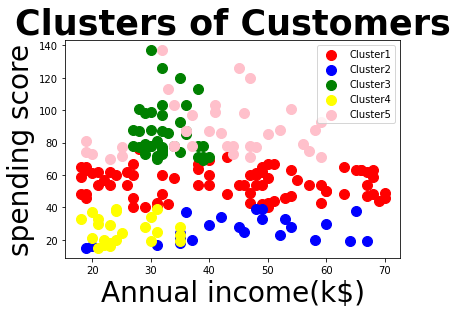

In [18]:
#Taking number of clusters = 5
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 10)
y_kmeans = kmeans.fit_predict(X)

# PLotting the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers', **font_title)
plt.xlabel('Annual income(k$)', **font_axes)
plt.ylabel('spending score', **font_axes)
plt.legend()
plt.show()